In [1]:
import matplotlib.pyplot as plt
from pandas import get_dummies
import pandas as pd
import numpy as np
import matplotlib
import scipy
import numpy
import json
import sys
import csv

In [2]:
customer_dataset = pd.read_csv('customer_value_analysis.csv')

In [3]:
customer_dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [5]:
dataset_col = customer_dataset.columns
dataset_col

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
# replace space with _ 
new_colum = []

def clean_col(column):
    column = column.strip()
    column = column.replace(" ", "_")
    column = column.lower()
    return column

for col in dataset_col:
    new_colum.append(clean_col(col))

dataset_col = new_colum

print(dataset_col)

['customer', 'state', 'customer_lifetime_value', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'income', 'location_code', 'marital_status', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size']


In [7]:
# changed column names after cleaning
customer_dataset.columns = dataset_col

customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
customer                         9134 non-null object
state                            9134 non-null object
customer_lifetime_value          9134 non-null float64
response                         9134 non-null object
coverage                         9134 non-null object
education                        9134 non-null object
effective_to_date                9134 non-null object
employmentstatus                 9134 non-null object
gender                           9134 non-null object
income                           9134 non-null int64
location_code                    9134 non-null object
marital_status                   9134 non-null object
monthly_premium_auto             9134 non-null int64
months_since_last_claim          9134 non-null int64
months_since_policy_inception    9134 non-null int64
number_of_open_complaints        9134 non-null int64
number_of_policies               

In [8]:
# response column unique value
customer_dataset['response'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
response_group = customer_dataset.groupby('response').count()
response_group

,customer,state,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
response,,,,,,,,,,,,,,,,,,,,,
No,7826,7826,7826,7826,7826,7826,7826,7826,7826,7826,...,7826,7826,7826,7826,7826,7826,7826,7826,7826,7826
Yes,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,...,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308


In [10]:
response_group['customer']

response
No     7826
Yes    1308
Name: customer, dtype: int64

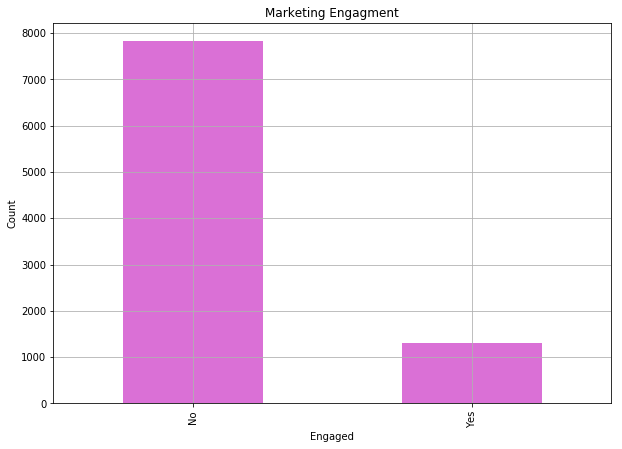

In [11]:
ax = response_group['customer'].plot(kind='bar', color='orchid', grid=True, figsize=(10,7), title='Marketing Engagment')
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

# engaged customer is more than non-engaged

In [12]:
response_group['customer']/ customer_dataset.shape[0]

response
No     0.856799
Yes    0.143201
Name: customer, dtype: float64

In [13]:
by_offer_type = customer_dataset[customer_dataset['response'] == 'Yes']
print(by_offer_type.shape)
print(by_offer_type['renew_offer_type'].unique())

(1308, 24)
['Offer2' 'Offer1' 'Offer3']


In [14]:
by_offer_type.groupby('renew_offer_type').count()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,sales_channel,total_claim_amount,vehicle_class,vehicle_size
renew_offer_type,,,,,,,,,,,,,,,,,,,,,
Offer1,594,594,594,594,594,594,594,594,594,594,...,594,594,594,594,594,594,594,594,594,594
Offer2,684,684,684,684,684,684,684,684,684,684,...,684,684,684,684,684,684,684,684,684,684
Offer3,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [15]:
customer_by_offer_type = by_offer_type.groupby('renew_offer_type').count()['customer']

customer_by_offer_type

renew_offer_type
Offer1    594
Offer2    684
Offer3     30
Name: customer, dtype: int64

In [16]:
# Get the engagement rates per renewal offer type
customer_renew_offer_type = customer_dataset.groupby('renew_offer_type').count()['customer']

by_offer_type_rate = customer_by_offer_type/ customer_renew_offer_type

print(by_offer_type_rate)

renew_offer_type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: customer, dtype: float64


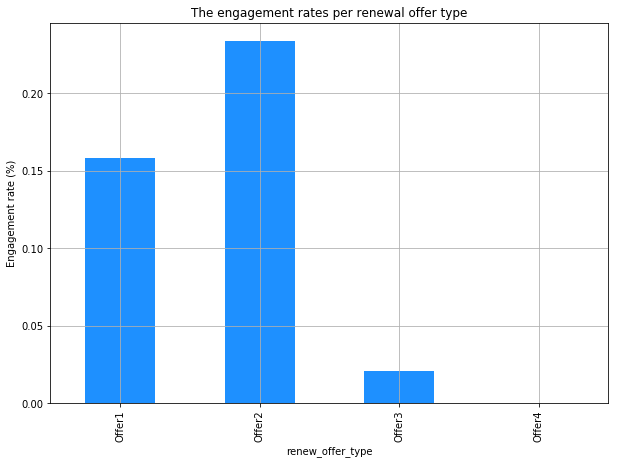

In [17]:
# Visualize it in a bar plot

ax = by_offer_type_rate.plot(kind='bar', figsize=(10,7), color='dodgerblue', grid=True, title = 'The engagement rates per renewal offer type')
plt.ylabel('Engagement rate (%)')
plt.show()    

In [18]:
customer_by_offer_type = by_offer_type.groupby(['renew_offer_type','vehicle_class']).count()['customer']
customer_by_offer_type

renew_offer_type  vehicle_class
Offer1            Four-Door Car    264
                  Luxury Car         6
                  Luxury SUV        18
                  SUV              168
                  Sports Car        42
                  Two-Door Car      96
Offer2            Four-Door Car    336
                  Luxury Car         6
                  Luxury SUV        12
                  SUV              120
                  Sports Car        48
                  Two-Door Car     162
Offer3            Four-Door Car     24
                  Two-Door Car       6
Name: customer, dtype: int64

In [19]:
by_offer_type_df = customer_by_offer_type / customer_dataset.groupby('renew_offer_type').count()['customer']
by_offer_type_df

renew_offer_type  vehicle_class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: customer, dtype: float64

In [20]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

vehicle_class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
renew_offer_type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


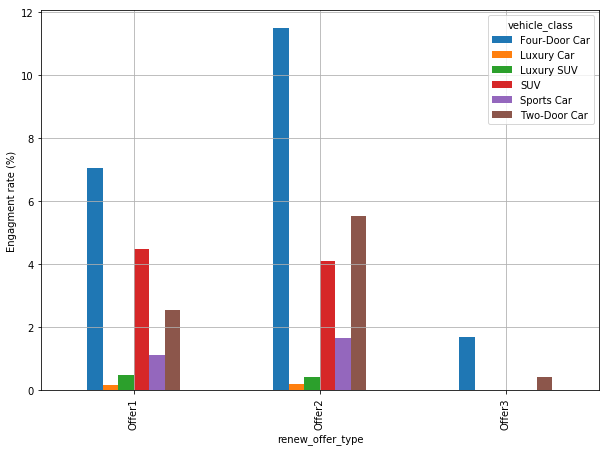

In [21]:
ax = (by_offer_type_df*100).plot(kind='bar', figsize=(10,7), grid=True)
ax.set_ylabel('Engagment rate (%)')

plt.show()

In [22]:
by_sales_channel_df = by_offer_type.groupby('sales_channel').count()['customer'] / customer_dataset.groupby('sales_channel').count()['customer']
by_sales_channel_df

sales_channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: customer, dtype: float64

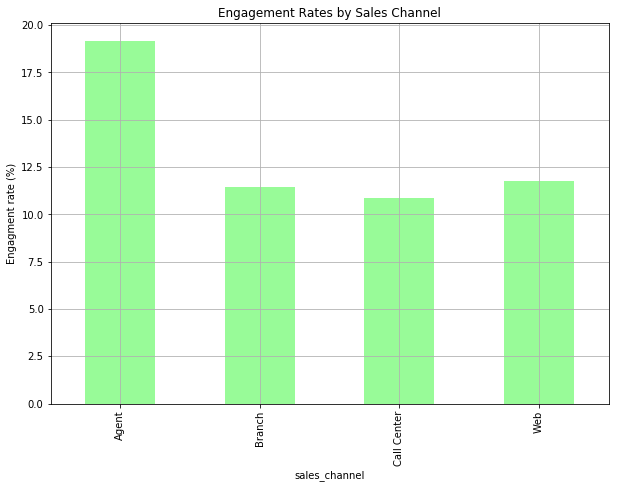

In [23]:
ax = (by_sales_channel_df*100).plot(kind='bar', figsize=(10,7),color='palegreen', grid=True, title='Engagement Rates by Sales Channel')
ax.set_ylabel('Engagment rate (%)')

plt.show()

In [24]:
by_sales_channel_df = by_offer_type.groupby(['sales_channel','vehicle_size']).count()['customer'] / customer_dataset.groupby('sales_channel').count()['customer']
by_sales_channel_df

sales_channel  vehicle_size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: customer, dtype: float64

In [25]:
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

vehicle_size,Large,Medsize,Small
sales_channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


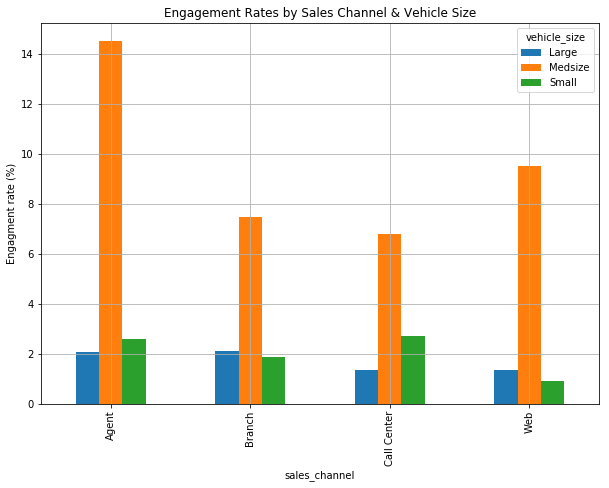

In [26]:
ax = (by_sales_channel_df*100).plot(kind='bar', figsize=(10,7),grid=True, title='Engagement Rates by Sales Channel & Vehicle Size')
ax.set_ylabel('Engagment rate (%)')

plt.show()

In [27]:
by_months_since_inception_df = by_offer_type.groupby(by='months_since_policy_inception').count()['response'] / customer_dataset.groupby('months_since_policy_inception').count()['response']
by_months_since_inception_df = by_months_since_inception_df.fillna(0)
by_months_since_inception_df

months_since_policy_inception
0     0.144578
1     0.141176
2     0.202247
3     0.263158
4     0.197802
5     0.068966
6     0.000000
7     0.075949
8     0.074074
9     0.187500
10    0.157895
11    0.173077
12    0.060000
13    0.148148
14    0.000000
15    0.220183
16    0.000000
17    0.118812
18    0.133333
19    0.169811
20    0.116505
21    0.114286
22    0.129032
23    0.204545
24    0.219512
25    0.134831
26    0.150000
27    0.123711
28    0.174757
29    0.122449
        ...   
70    0.235294
71    0.120000
72    0.237624
73    0.068182
74    0.197802
75    0.061224
76    0.069767
77    0.189474
78    0.073171
79    0.118812
80    0.164384
81    0.157895
82    0.000000
83    0.240000
84    0.060000
85    0.141176
86    0.000000
87    0.078947
88    0.078947
89    0.185567
90    0.142857
91    0.080000
92    0.162162
93    0.266667
94    0.250000
95    0.155844
96    0.179104
97    0.000000
98    0.000000
99    0.076923
Name: response, Length: 100, dtype: float64

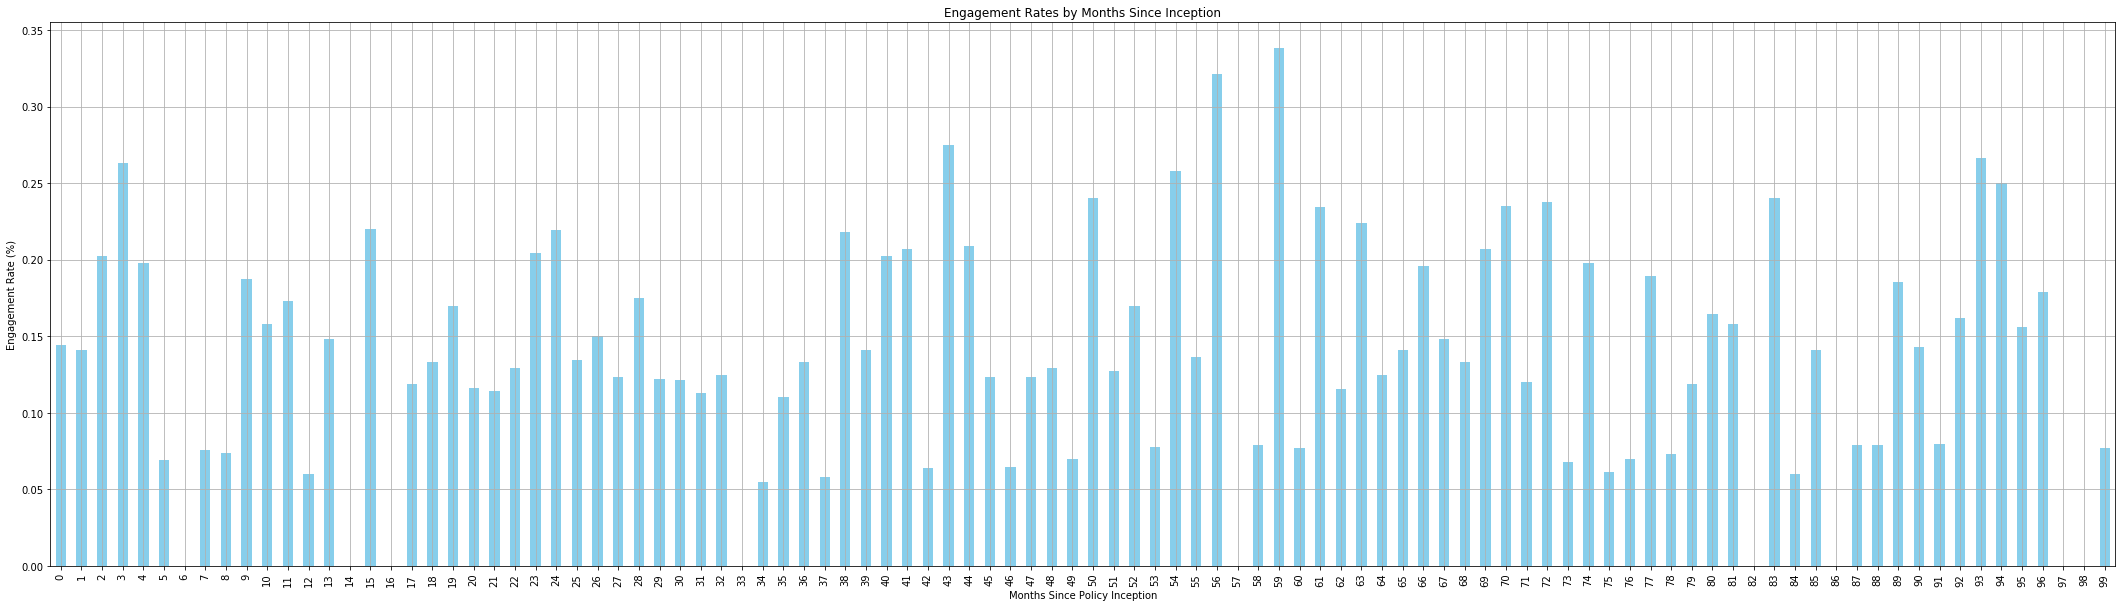

In [28]:
ax = (by_months_since_inception_df).plot(
    kind='bar', figsize=(37,10),grid=True, 
    title='Engagement Rates by Months Since Inception', color='skyblue')

ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')

plt.show()

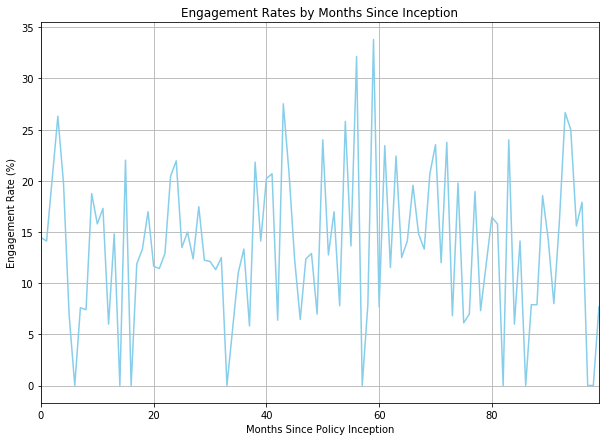

In [29]:
ax = (by_months_since_inception_df*100).plot(
     figsize=(10,7),grid=True, 
    title='Engagement Rates by Months Since Inception', color='skyblue')

ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')

plt.show()

In [30]:
customer_dataset['customer_lifetime_value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [31]:
customer_dataset['clv_segment'] = customer_dataset['customer_lifetime_value'].apply(
    lambda x : 'High' if x > customer_dataset['customer_lifetime_value'].median() else 'Low'
)

In [32]:
customer_dataset.groupby('clv_segment').count()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
clv_segment,,,,,,,,,,,,,,,,,,,,,
High,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,...,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566
Low,4568,4568,4568,4568,4568,4568,4568,4568,4568,4568,...,4568,4568,4568,4568,4568,4568,4568,4568,4568,4568


In [33]:
customer_dataset['policy_age_segment'] = customer_dataset['months_since_policy_inception'].apply(
 lambda x :'High' if x > customer_dataset['months_since_policy_inception'].median() else 'Low'
)

In [34]:
customer_dataset.groupby('policy_age_segment').count()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,clv_segment
policy_age_segment,,,,,,,,,,,,,,,,,,,,,
High,4502,4502,4502,4502,4502,4502,4502,4502,4502,4502,...,4502,4502,4502,4502,4502,4502,4502,4502,4502,4502
Low,4632,4632,4632,4632,4632,4632,4632,4632,4632,4632,...,4632,4632,4632,4632,4632,4632,4632,4632,4632,4632


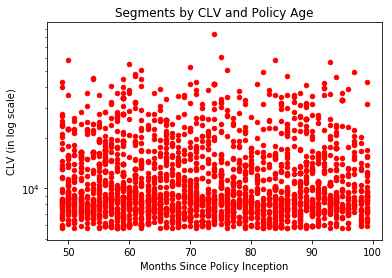

In [35]:
ax = customer_dataset[(customer_dataset['clv_segment'] == 'High') & (customer_dataset['policy_age_segment']=='High')].plot.scatter(
    x = 'months_since_policy_inception',
    y = 'customer_lifetime_value',
    logy = True,
    color='red'
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()

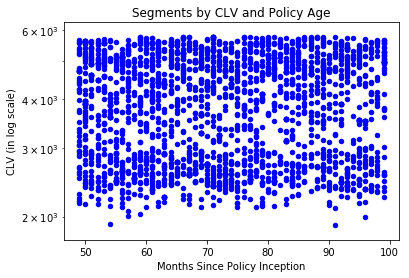

In [36]:
ax = customer_dataset[(customer_dataset['clv_segment'] == 'Low') & (customer_dataset['policy_age_segment']=='High')].plot.scatter(
    x = 'months_since_policy_inception',
    y = 'customer_lifetime_value',
    logy = True,
    color='blue'
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()

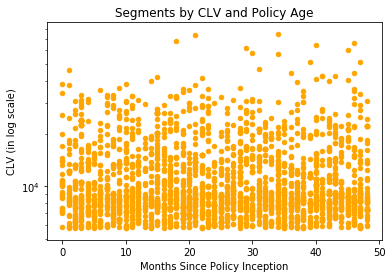

In [37]:
ax = customer_dataset[(customer_dataset['clv_segment'] == 'High') & (customer_dataset['policy_age_segment']=='Low')].plot.scatter(
    x = 'months_since_policy_inception',
    y = 'customer_lifetime_value',
    logy = True,
    color='orange'
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()

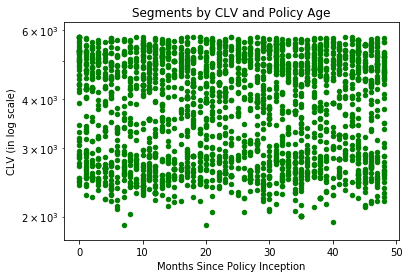

In [38]:
ax = customer_dataset[(customer_dataset['clv_segment'] == 'Low') & (customer_dataset['policy_age_segment']=='Low')].plot.scatter(
    x = 'months_since_policy_inception',
    y = 'customer_lifetime_value',
    logy = True,
    color='green'
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()

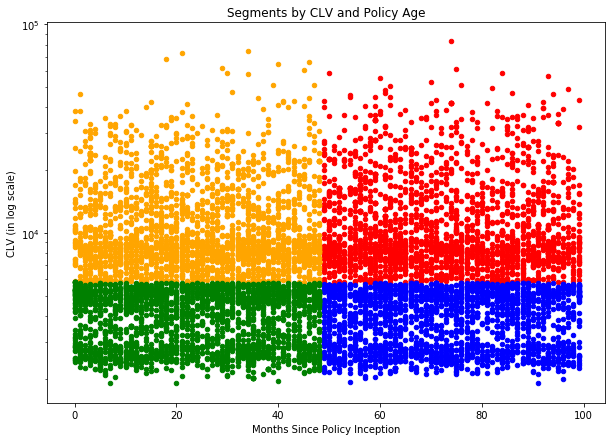

In [39]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

customer_dataset[(customer_dataset['clv_segment'] == 'High') & (customer_dataset['policy_age_segment']=='High')].plot.scatter(
    ax=ax,
    x = 'months_since_policy_inception',
    y = 'customer_lifetime_value',
    logy = True,
    color='red'
)

customer_dataset[(customer_dataset['clv_segment'] == 'Low') & (customer_dataset['policy_age_segment']=='High')].plot.scatter(
    ax=ax,
    x = 'months_since_policy_inception',
    y = 'customer_lifetime_value',
    logy = True,
    color='blue'
)

customer_dataset[(customer_dataset['clv_segment'] == 'High') & (customer_dataset['policy_age_segment']=='Low')].plot.scatter(
    ax=ax,
    x = 'months_since_policy_inception',
    y = 'customer_lifetime_value',
    logy = True,
    color='orange'
)

customer_dataset[(customer_dataset['clv_segment'] == 'Low') & (customer_dataset['policy_age_segment']=='Low')].plot.scatter(
    ax=ax,
    x = 'months_since_policy_inception',
    y = 'customer_lifetime_value',
    logy = True,
    color='green'
)


plt.ylabel('CLV (in log scale)')
plt.xlabel('Months Since Policy Inception')
plt.title('Segments by CLV and Policy Age')
#plt.show()

fig.savefig('Policy_Inception.png')




In [40]:
by_offer_type = customer_dataset[customer_dataset['response'] == 'Yes']
engagement_rates_by_segment = by_offer_type.groupby(['clv_segment','policy_age_segment']).count()
engagement_rates_by_segment = engagement_rates_by_segment['customer'] / customer_dataset.groupby(['clv_segment','policy_age_segment']).count()['customer']
engagement_rates_by_segment

clv_segment  policy_age_segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: customer, dtype: float64

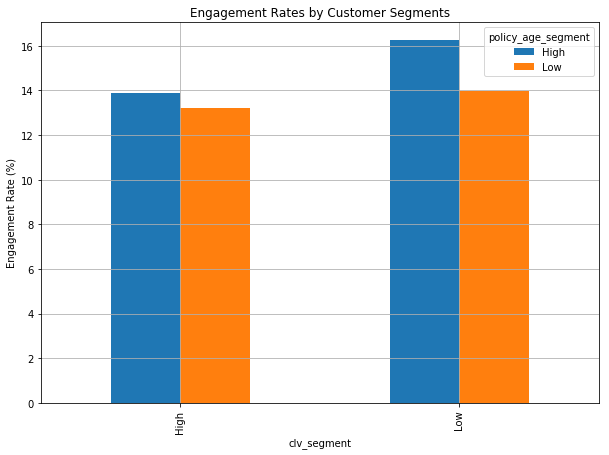

In [41]:
ax = (engagement_rates_by_segment.unstack()*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')
plt.show()